# Titanic Survivor Project

## 타이타닉호의 생존자 데이터 분석 및 keras 를 활용한 생존율 예측 프로그램

1912년 침몰한 타이타닉호 생존 가능성 예측 프로그램입니다. 타이타닉호의 탑승자들의 데이터를 받고 정보에 따라 분석해서, keras로 학습합니다.<br>
또한, 학습모델을 플라스크 웹 서버와 연동하도록 구현하여,
서버에 접속하고 안내를 따라 사용자의 정보를 입력하면 타이타닉 호 침몰 시 해당 사용자의 생존 가능성을 계산하여 알려주는 프로그램입니다.

## 데이터 분석해보기
타이타닉호의 탑승자 데이터를 가져와 여러가지 통계를 분석하고 시각화하는 일을 해보겠습니다.

### 사용한 도구
사용한 언어: python<br>
사용한 라이브러리: 학습을 위한 keras (tensorflow backend), 데이터 분석 및 시각화를 위한 matplotlib, 파일을 읽어오기 위한 pandas, 그밖의 numpy 등<br>
데이터 출처: kaggle (https://www.kaggle.com/broaniki/titanic)

-------


먼저, 필요한 라이브러리들을 가져올 것입니다.
파일을 읽어오는 pandas, plot을 그릴 수 있는 matplotlib, 연산에 필요한 numpy를 import합니다.
그 후 저장해둔 데이터를(excel파일) pandas를 사용해 읽어옵니다.

In [3]:
# 필요한 라이브러리를 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# pandas로 데이터파일 읽어오기
raw_data = pd.read_excel('./data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


읽어온 데이터는 와 같이 14개의 columns, 즉 14개의 항목을 갖는 총 1309개 데이터임을 확인할 수 있습니다<br>

pclass: 객실 등급<br>
survived: 생존 여부 (0,1)<br>
name: 이름<br>
sex: 성별<br>
age: 나이<br>
sibsp: 동승한 형제자매 수<br>
parch: 동승한 부모 수<br>
ticket: 티켓 번호<br>
fare: 지불한 운임<br>
cabin: 객실 위치<br>
boat: 구명 보트 탑승 여부<br>
home.dest: 탑승지와 도착지<br>

이제 각 항목별로 데이터들의 수치를 분석해봅니다.

In [2]:
# 각 항목별 통계 수치 분석
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


총 1309개의 데이터가 있고, 각 항목에 따라 평균, 최소 최대값등을 보여줍니다.

생존자의 비율을 그래프로 시각화해 보겠습니다.

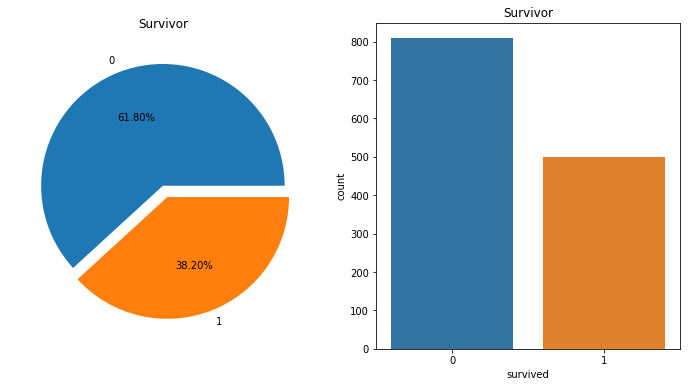

In [4]:
# 생존자 비율 시각화
f,ax=plt.subplots(1,2,figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survivor')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survivor')
plt.show()

생존률이 너무 낮습니다. 500명 정도가 구조된 것으로 보입니다.

연령별 탑승자도 시각화해 보겠습니다. 또한 groupby()로 선실 등급별 상황을 볼 수 있습니다.

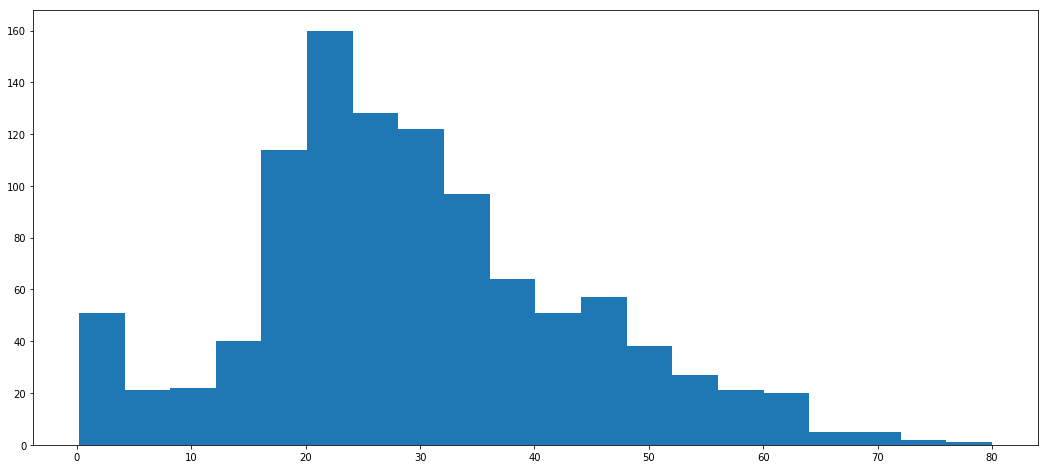

In [4]:
# 연령별 탑승자 분석
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False);

In [5]:
# 객실 등급별 탑승자 평균 분석
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


사실 이렇게 해서는 어떤 변수가 생존율과 얼만큼 관계있는지 한눈에 보기 어렵습니다.<br>
따라서 각각 변수들과의 상관관계를 분석해보기 위해 corr()을 사용해 표로 heatmap을 나타내 보았습니다.

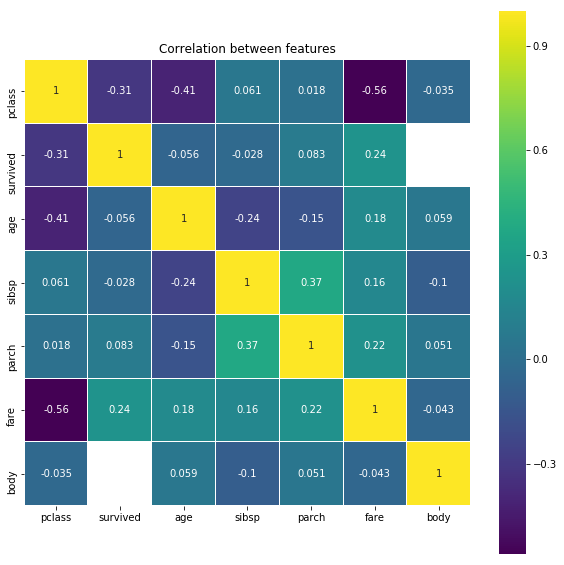

In [6]:
# 변수들 간의 상관관계 분석
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

각 항목별로 살펴보면, survived는 0.56의 절대치를 가진 pclass와 fare과 가장 관계가 있어보입니다. 이 둘을 중심으로 데이터를 추려서 학습시키면 될 것 같습니다.

각 항목별로 생존자들을 분류해 한눈에 보기 쉽게 그래프로 만들어보겠습니다.

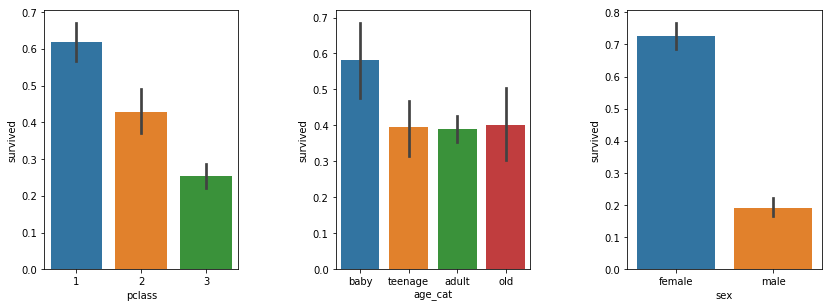

In [7]:
# 각 항목별로 생존자 분류 및 시각화
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])

plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

그리고 구조 보트에 탑승한 사람들은 얼마나 살았을지도 확인해 봅시다.

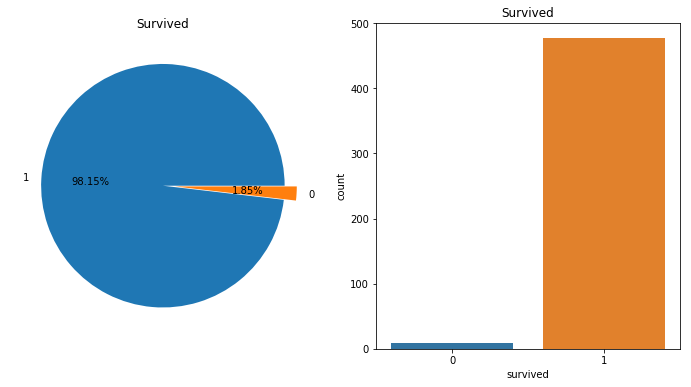

In [8]:
# 구조 보트에 탑승한 사람들의 생존율 분석
boat_survivors = raw_data[raw_data['boat'].notnull()]
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

역시 구조보트에 탔던 사람들은 98.15퍼센트 살아남았던 걸로 나왔습니다. 따라서 보트 탑승 여부는 생존확률 예측에 너무 결정적일 듯 합니다.